In [1]:
# coding: utf-8

from datetime import timedelta, datetime

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
# importa a biblioteca plotly.graph_objs para criação do gráfico interativo
import plotly.graph_objs as go

# import wget
# import os

In [2]:
plt.style.use('seaborn')

# # delete a old file
# # os.remove("./JHU_COVID-19.csv")
# os.remove("./full_data.csv")
# # download the new datasheet form JH
# # url ="https://s3-us-west-1.amazonaws.com/starschema.covid/JHU_COVID-19.csv"
# url ="https://covid.ourworldindata.org/data/ecdc/full_data.csv"
# output_directory = "."
# filename = wget.download(url, out=output_directory)


# read a csv to DataFrame with pandas
data = pd.read_csv("https://covid.ourworldindata.org/data/ecdc/full_data.csv")

# data from 🔅 Worldometers:
# Cases =  30425. #❗️(103 novos)
# Deaths = 1924 #❗️(11 novos) 😔
# Recupered = 4390
# txfa = Deaths/Cases
# txre = Recupered/Cases

data.index = pd.to_datetime(data.date)
# sel data form Brazil
ctry = data[data["location"] == 'Brazil']
tested = ctry.copy()

# create a arrays for curve fit parameters of a exponential equation
# xdays = []
# ydata = []
dateCase = []
# today=datetime.now().date()
# offsetcases = 1000.
# ndays=10
# ################################### Cases #####
# cond_idx = tested.index[np.where(tested["total_cases"]>offsetcases)]
# case1 = cond_idx[0]
# ndate = cond_idx
# ########################################
# for ib in enumerate(ndate):
#     if tested["total_cases"][cond_idx[ib[0]]] >= offsetcases:
#         selday = (ib[1]-case1).days == np.arange(0,len(cond_idx)+ndays,ndays)
#         if True in selday:
#             xdays.append((ib[1]-case1).days)
#             ydata.append(tested["total_cases"][cond_idx[ib[0]]])
#             dateCase.append(tested["date"][cond_idx[ib[0]]])
# >>>>>>>>>

# do fiting
# ydata = tested.last("5W").resample('1W').mean().total_cases.values
ydata = tested.last("5W").total_cases.values
xdata = np.arange(len(ydata))
ndate = tested.last("1D").index[0]

for i in range(5):
    dateCase.append((ndate + timedelta(days=i)).date())
dateCase = pd.to_datetime(dateCase)

# ajuste exponencial com a func, dos dados xdata e ydata Brasil
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(b * x) + c
poptbr, pcovbr = curve_fit(func, xdata, ydata)
perrbr = np.sqrt(np.diag(pcovbr))
# Forecast 5 days
# ultimo = (ndate-case1).days
# prbrxdata = np.arange(ultimo-1,ultimo+4)
ultimo = len(xdata)
prbrxdata = np.arange(ultimo - 1, ultimo + 4)
prbrdata = func(prbrxdata, *poptbr)
serro = func(prbrxdata, *(poptbr + perrbr))
ierro = func(prbrxdata, *poptbr - perrbr)
hojebr = func(len(xdata), *poptbr)

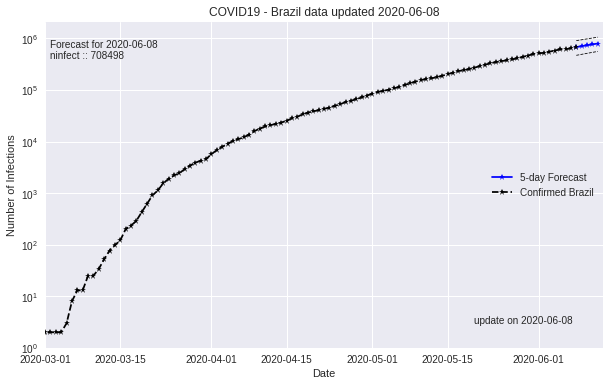

In [3]:
# Graphic Brazil

# Graphic Brazil

# Graphic Brazil
fig = plt.figure(figsize=[10, 6])
ax2 = plt.subplot()

ax2.plot(dateCase[-len(prbrdata):], prbrdata, "b*-", label="5-day Forecast")
ax2.plot(dateCase[-len(prbrdata):], ierro, 'k--', lw=.8)
ax2.plot(dateCase[-len(prbrdata):], serro, 'k--', lw=.8)
ax2.plot(tested.index, tested["total_cases"], "k*--", label="Confirmed Brazil")

ax2.text(pd.to_datetime("2020-03-02"), tested["total_cases"][-1], "Forecast for "+str(datetime.now().date()))
ax2.text(pd.to_datetime("2020-03-02"), tested["total_cases"][-12], "ninfect :: "+str(int(hojebr)))


ax2.set_title("COVID19 - Brazil data updated "+str(tested["date"][tested.index[-1]]))
ax2.text(pd.to_datetime('2020-05-20'), 3, 'update on ' + str(datetime.now().date()))
ax2.set_xlabel("Date")
ax2.set_ylabel("Number of Infections")
ax2.set_xlim(pd.to_datetime("2020-03-01").date(), datetime.now().date()+timedelta(days=5))
ax2.set_yscale('log')
ax2.set_ylim(1,)
ax2.legend(loc="center right")
# ax2.grid(1)
plt.show()
# fig.savefig("images/log_data_forecast_brazil.png", dpi=350)

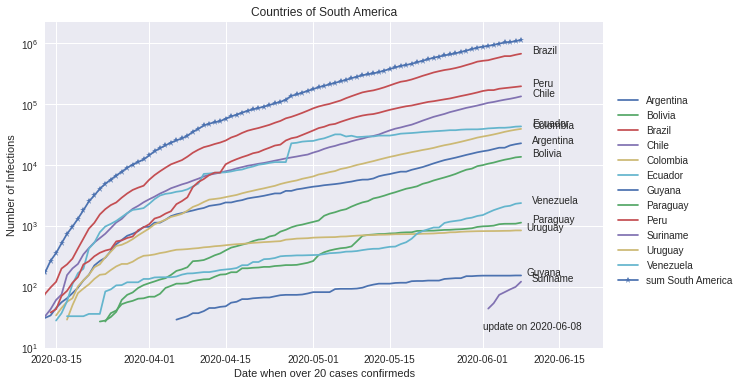

In [4]:
#  Countreis of South America
############################SA##############
############################SA##############
total_data = data.copy()
sa = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador', 'Falkland Islands', 'French Guiana',
      'Guyana', 'Paraguay', 'Peru', 'Suriname', 'Uruguay', 'Venezuela']
sa = sorted(sa)
san = total_data[(total_data.location.isin(sa))]
san = san.drop(['date'], axis=1)
psum = san.groupby('date').total_cases.sum()

############################SA##############
today = datetime.now().date()
fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in sa:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 26.)]
    if len(p) > 0:
        ax.plot(pd.to_datetime(p.date),p.total_cases, label=ii)
        lf = p.total_cases.index[p.total_cases.argmax()].date()
        ax.text(lf+timedelta(days=2),p.total_cases.max(), ii)
ax.plot(psum,'-*',label= 'sum South America')
ax.text(pd.to_datetime('2020-06-01'), 20, 'update on ' + str(today))
ax.set_yscale('log')
ax.set_title("Countries of South America")
ax.set_ylabel("Number of Infections")
ax.set_xlim(pd.to_datetime('2020-03-13').date(), lf+timedelta(days=15))
ax.set_xlabel('Date when over 20 cases confirmeds')
ax.set_ylim(10,)
plt.legend(loc='upper center', bbox_to_anchor=(1.13, 0.8), shadow=True, ncol=1)
plt.show()
# fig.savefig("images/southAmerica_brazil.png", dpi=350)
# plt.close()

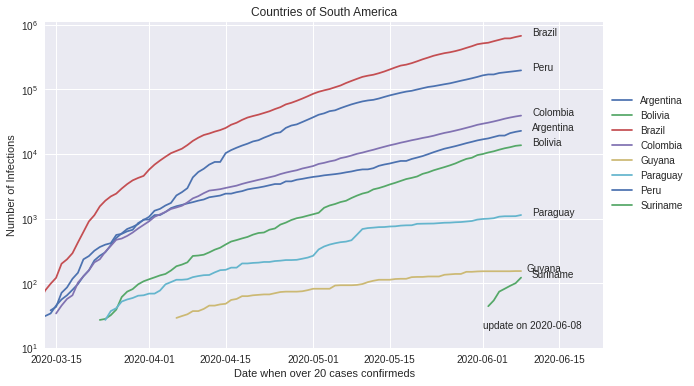

In [5]:
############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################
############################ Countries bordering of Brazil ############################

borderBR = ['Argentina', 'Bolivia', 'Brazil', 'Colombia', 'French Guiana', 'Guyana', 'Paraguay', 'Peru', 'Suriname']
borderBR = sorted(borderBR)

# psum.values
############################
fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in borderBR:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 26.)]
    if len(p) > 0:
        ax.plot(pd.to_datetime(p.date),p.total_cases, label=ii)
        lf = p.total_cases.index[p.total_cases.argmax()].date()
        ax.text(lf+timedelta(days=2),p.total_cases.max(), ii)
ax.text(pd.to_datetime('2020-06-01'), 20, 'update on ' + str(today))
ax.set_yscale('log')
ax.set_title("Countries of South America")
ax.set_ylabel("Number of Infections")
ax.set_xlim(pd.to_datetime('2020-03-13').date(), lf+timedelta(days=15))
ax.set_xlabel('Date when over 20 cases confirmeds')
ax.set_ylim(10,)
plt.legend(loc='upper center', bbox_to_anchor=(1.08, 0.8), shadow=True, ncol=1)
plt.show()
# fig.savefig("images/border_brazil.png", dpi=350)
# plt.close()

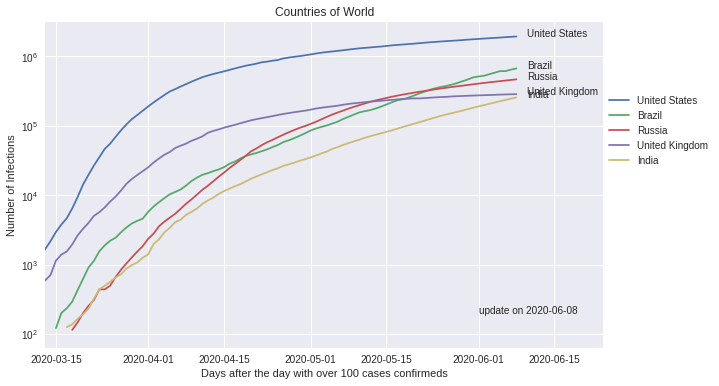

In [6]:
################# world############################ world###########
################# world############################ world###########

top = total_data[~total_data.location.isin(['World'])].sort_values('total_cases',ascending=False).location.unique()[:5]
top
# top.append("Brazil")

################# world############################ world###########
################# world############################ world###########

fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()

for ii in top:
    p = total_data[(total_data["location"] == ii) & (total_data["total_cases"] > 100.)]
    if len(p) > 0:
        ax.plot(p.total_cases, label=ii)
        lf = p.total_cases.index[p.total_cases.argmax()].date()
        ax.text(lf+timedelta(days=2),p.total_cases.max(), ii)
ax.text(pd.to_datetime('2020-06-01'), 200, 'update on ' + str(today))
ax.set_yscale('log')
ax.set_title("Countries of World")
ax.set_ylabel("Number of Infections")
ax.set_xlim(pd.to_datetime('2020-03-13').date(), lf+timedelta(days=16))
ax.set_xlabel('Days after the day with over 100 cases confirmeds')
plt.legend(loc='upper center', bbox_to_anchor=(1.10, 0.8), shadow=True, ncol=1)
plt.show()
# fig.savefig("images/top_world.png", dpi=350)
# plt.close()

['SP' 'RJ' 'CE' 'PA' 'AM']


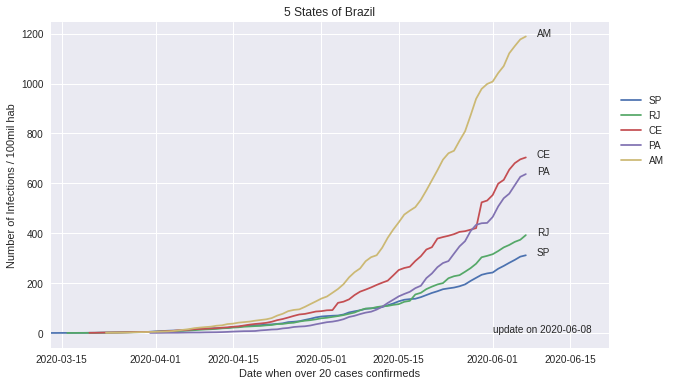

In [7]:
# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
# top 5 STATES OF BRAZIL########################
url = "https://raw.githubusercontent.com/wcota/covid19br/master/cases-brazil-states.csv"
dados_brazil = pd.read_csv(url, header=0, index_col="date")
############
############
dados_brazil.index = pd.to_datetime(dados_brazil.index)
nna = dados_brazil.loc[:, ["state", "totalCases"]].where((dados_brazil["state"] != 'TOTAL') & (dados_brazil["totalCases"] > 26.)).dropna().sort_values(
    by="totalCases",
    ascending=False)
TOP5 = nna.state.unique()[:5]
print(TOP5)
########################### TOP 5 ############
############
############
fig = plt.figure(figsize=[10, 6])
ax = plt.subplot()
# totalCases_per_100k_inhabitants
for ii in TOP5:
    p = dados_brazil[(dados_brazil["state"] == ii) & (dados_brazil["totalCases"] > 26.)]
    if len(p) > 0:
        ax.plot(p.totalCases_per_100k_inhabitants, label=ii)
        lf = p.totalCases_per_100k_inhabitants.index[p.totalCases_per_100k_inhabitants.argmax()].date()
        ax.text(lf+timedelta(days=2),p.totalCases_per_100k_inhabitants.max(), ii)
ax.text(pd.to_datetime('2020-06-01'), 1, 'update on ' + str(today))
# ax.set_yscale('log')
ax.set_title("5 States of Brazil")
ax.set_ylabel("Number of Infections / 100mil hab")
ax.set_xlim(pd.to_datetime('2020-03-13').date(), lf+timedelta(days=15))
ax.set_xlabel('Date when over 20 cases confirmeds')
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 0.8), shadow=True, ncol=1)
plt.grid("both")
plt.show()
# fig.savefig("images/n20cases_TOP5.png", dpi=350)
# plt.close()